In [2]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Probability of winning')

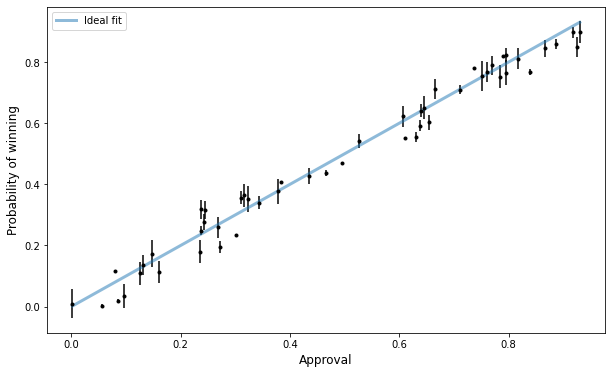

In [50]:
N = 51
true_a = 1
true_b = 0

np.random.seed(1111)
x = np.sort(np.random.rand(N))
y = true_a * x + true_b + 0.1*(np.random.rand(N) - np.random.rand(N))
for i in range(len(y)):
    if y[i] < 0:
        y[i] = 0
    elif y[i] > 1:
        y[i] = 1
yerr = 0.05 * np.random.rand(N)

plt.figure(figsize = (10, 6))
plt.errorbar(x, y, yerr, fmt=".k")
line = true_a * x + true_b
plt.plot(x, line, alpha = 0.5, lw = 3, label = "Ideal fit")
plt.legend()
plt.xlabel('Approval', size = 12)
plt.ylabel('Probability of winning', size = 12)

In [45]:
# Assuming Gaussian error
def log_likelihood(theta, x, y, yerr):
    a, b = theta
    model = a * x + b
    sigma2 = yerr ** 2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

def log_prior(theta):
    a, b = theta
    if -1.0 < a < 3. and -5. < b < 5.:
        return 0.0
    return -np.inf

def log_posterior(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [51]:
import emcee

num_iter = 5000
ndim = 2
nwalkers = 32
initial_pos = np.array((0.5, 1.3)) + 0.01 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y, yerr))
sampler.run_mcmc(initial_pos, num_iter, progress=True);

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1508.51it/s]


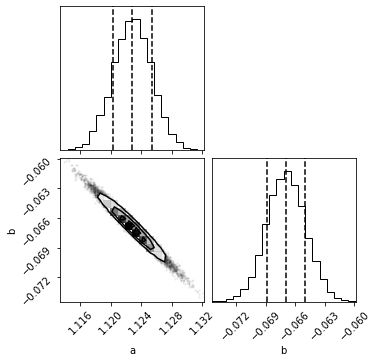

In [52]:
import corner

flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

labels = ['a', 'b']
fig = corner.corner(flat_samples, labels=labels, quantiles=[0.16, 0.5, 0.84]);

Text(0, 0.5, 'Probability of winning')

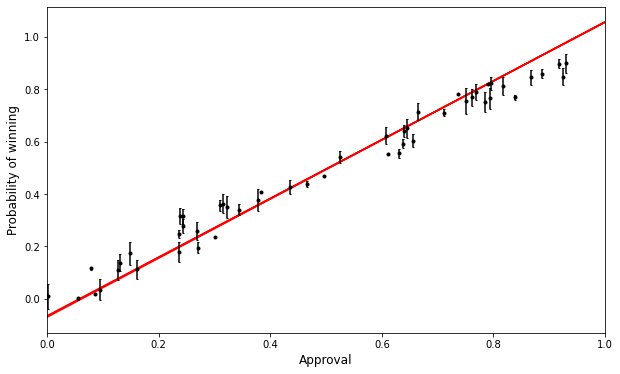

In [53]:
inds = np.random.randint(len(flat_samples), size=100)
x0 = np.linspace(0, 1, 100)
f, ax = plt.subplots(figsize=(10,6))
for ind in inds:
    sample = flat_samples[ind]
    ax.plot(x0, sample[0] * x0 + sample[1], alpha=0.05, color='red')
ax.errorbar(x, y, yerr=yerr, linestyle = 'None',capsize=1, marker ='o', color='black', ms=3)
ax.set_xlim(0, 1)
ax.set_xlabel('Approval', size = 12)
ax.set_ylabel('Probability of winning', size = 12)